In [5]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np  
%matplotlib inline



In [13]:
df = pd.read_csv("bank-additional-full.csv")
df.sample(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20090,32,admin.,married,university.degree,no,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
26941,33,admin.,single,university.degree,no,yes,yes,cellular,nov,thu,...,4,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no
15195,24,technician,single,basic.6y,no,yes,no,telephone,jul,thu,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,yes
39998,33,services,married,high.school,no,yes,no,cellular,jun,wed,...,2,12,2,success,-1.7,94.055,-39.8,0.767,4991.6,yes
852,31,services,married,basic.6y,no,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


In [15]:
# List of columns to drop
columns_to_drop = ['pdays', 'previous', 'poutcome', 'default', 'contact']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Check the resulting DataFrame
print(df.head())



   age        job  marital    education housing loan month day_of_week  \
0   56  housemaid  married     basic.4y      no   no   may         mon   
1   57   services  married  high.school      no   no   may         mon   
2   37   services  married  high.school     yes   no   may         mon   
3   40     admin.  married     basic.6y      no   no   may         mon   
4   56   services  married  high.school      no  yes   may         mon   

   duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0       261         1           1.1          93.994          -36.4      4.857   
1       149         1           1.1          93.994          -36.4      4.857   
2       226         1           1.1          93.994          -36.4      4.857   
3       151         1           1.1          93.994          -36.4      4.857   
4       307         1           1.1          93.994          -36.4      4.857   

   nr.employed   y  
0       5191.0  no  
1       5191.0  no  
2    

In [17]:
# Check for null values in each column
null_values = df.isnull().sum()

# Display columns with their corresponding number of null values
print(null_values)


age               0
job               0
marital           0
education         0
housing           0
loan              0
month             0
day_of_week       0
duration          0
campaign          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [19]:
df.dtypes


age                 int64
job                object
marital            object
education          object
housing            object
loan               object
month              object
day_of_week        object
duration            int64
campaign            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

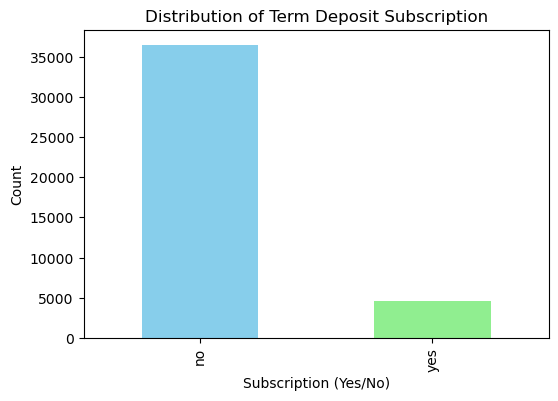

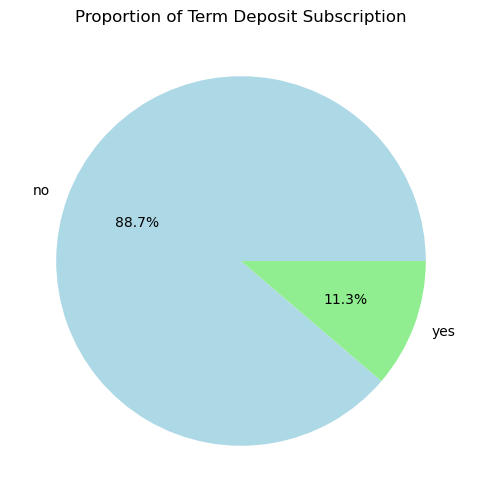

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each target class
target_counts = df['y'].value_counts()

# Bar plot
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Subscription (Yes/No)')
plt.ylabel('Count')
plt.show()

# Optional: Pie chart
plt.figure(figsize=(6, 6))
target_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Term Deposit Subscription')
plt.ylabel('')  # Hides the ylabel
plt.show()


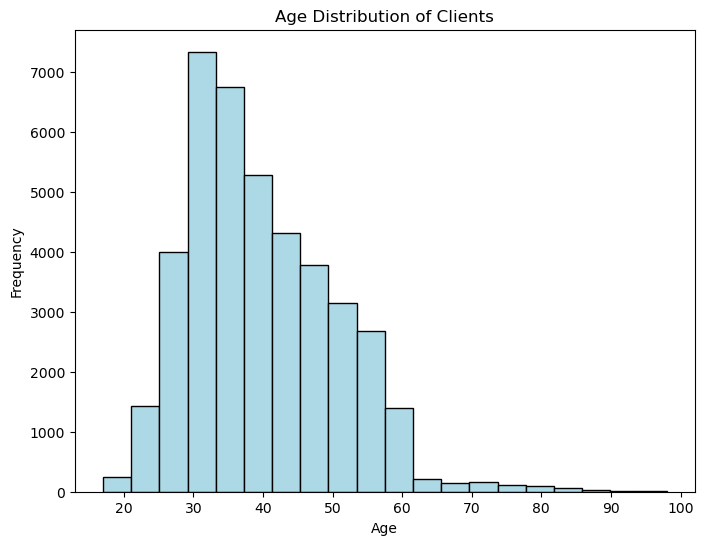

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='lightblue', edgecolor='black')
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


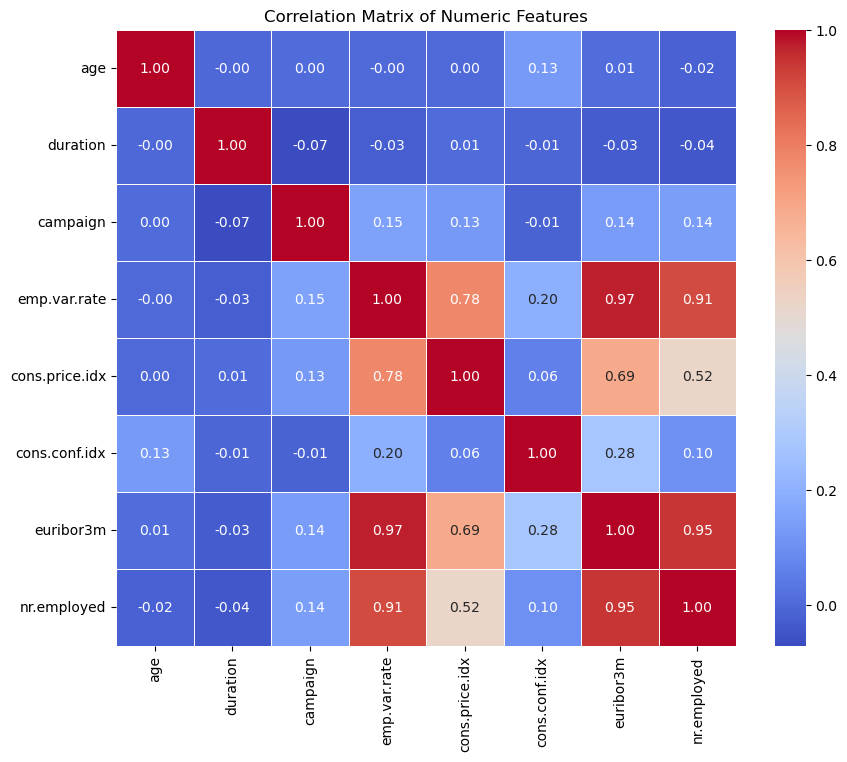

In [39]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


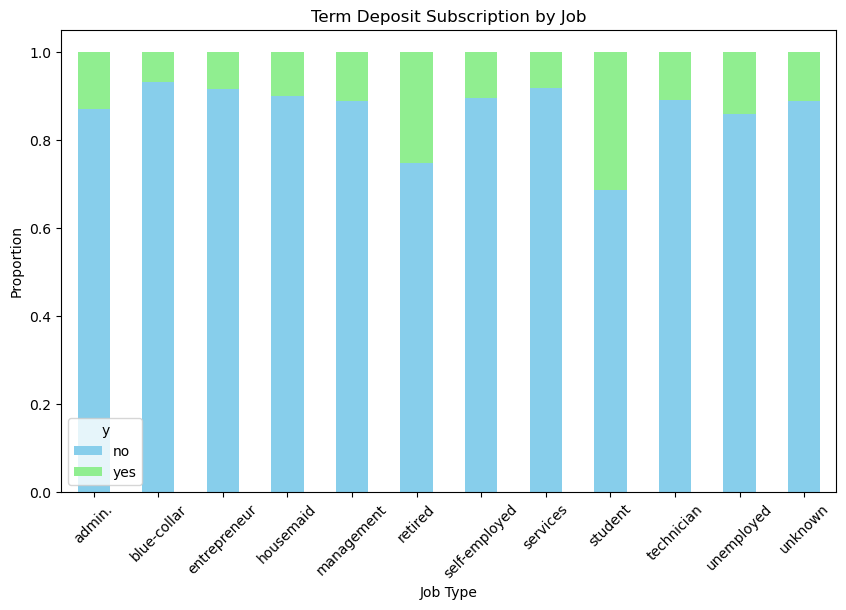

In [27]:
job_counts = df.groupby('job')['y'].value_counts(normalize=True).unstack()

# Plot the subscription rate by job
job_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Term Deposit Subscription by Job')
plt.xlabel('Job Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


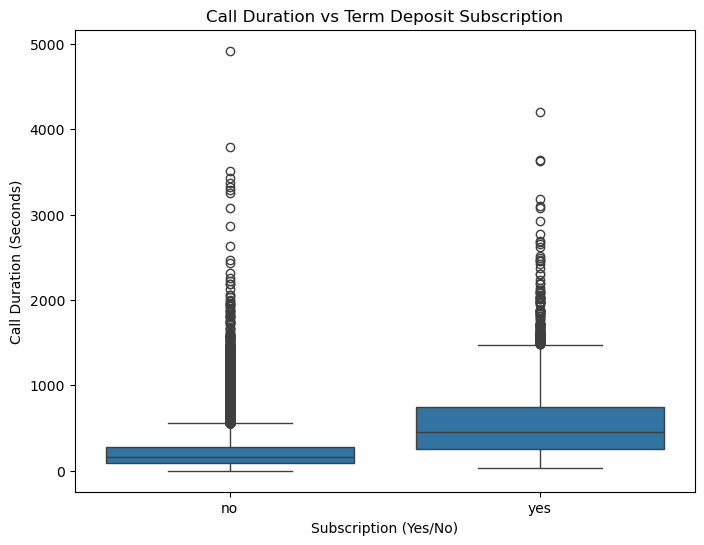

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Call Duration vs Term Deposit Subscription')
plt.xlabel('Subscription (Yes/No)')
plt.ylabel('Call Duration (Seconds)')
plt.show()


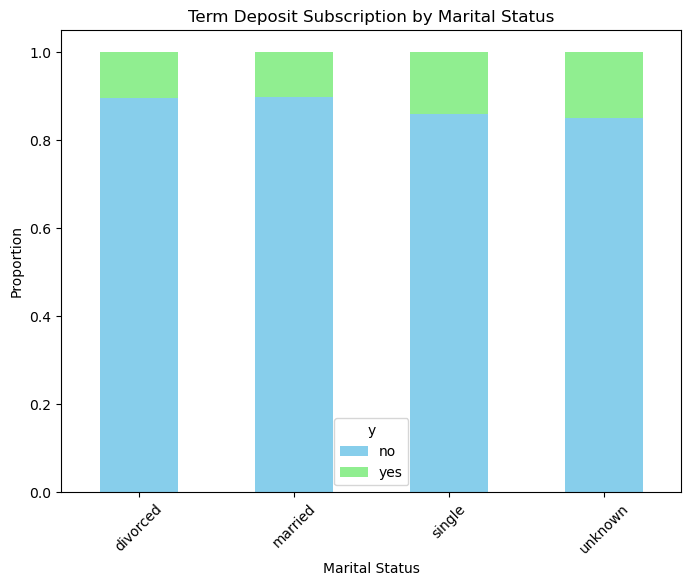

In [31]:
marital_counts = df.groupby('marital')['y'].value_counts(normalize=True).unstack()

# Plot the subscription rate by marital status
marital_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightgreen'])
plt.title('Term Deposit Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


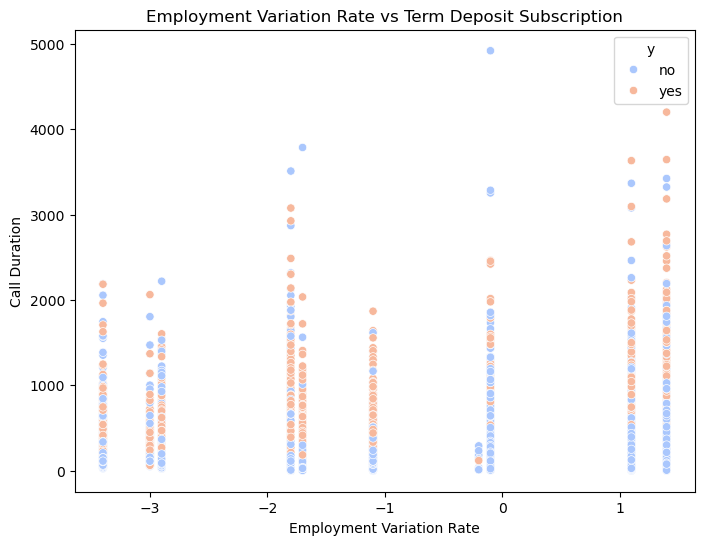

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='emp.var.rate', y='duration', hue='y', data=df, palette='coolwarm')
plt.title('Employment Variation Rate vs Term Deposit Subscription')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Call Duration')
plt.show()


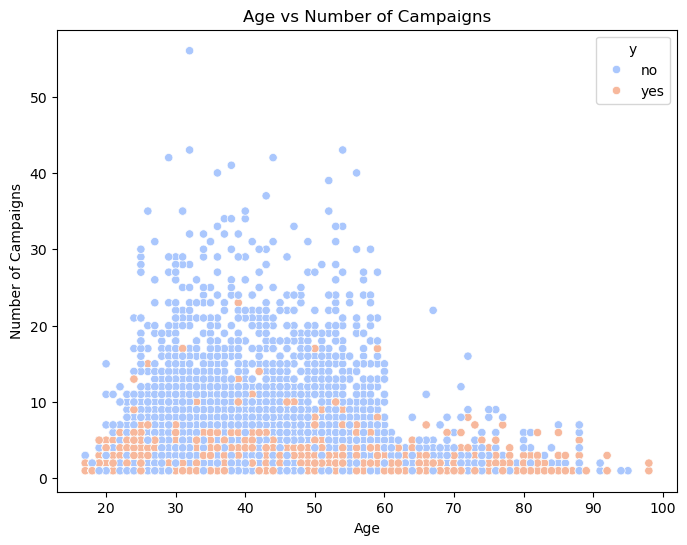

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='campaign', hue='y', data=df, palette='coolwarm')
plt.title('Age vs Number of Campaigns')
plt.xlabel('Age')
plt.ylabel('Number of Campaigns')
plt.show()


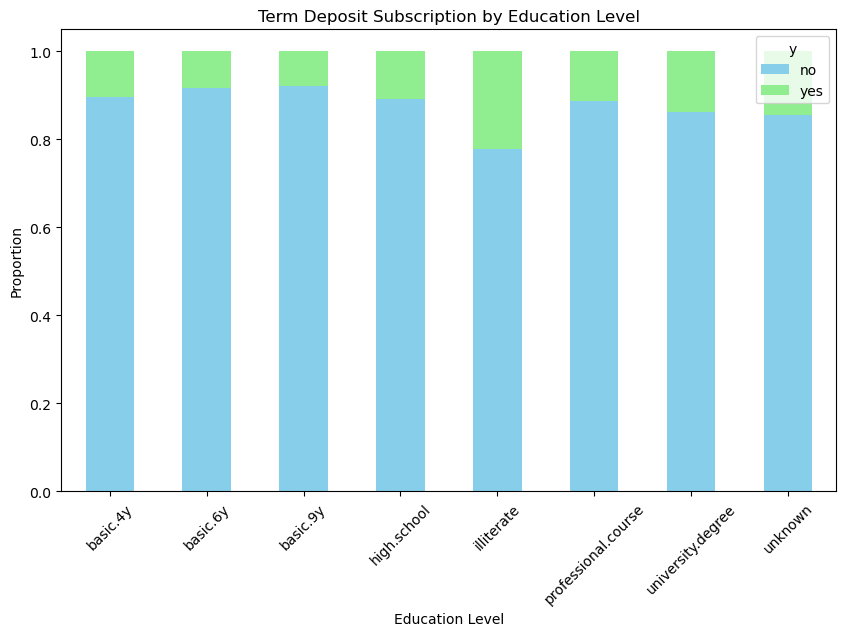

In [37]:
education_counts = df.groupby('education')['y'].value_counts(normalize=True).unstack()

# Plot the subscription rate by education level
education_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Term Deposit Subscription by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


In [43]:
# List of categorical columns for one-hot encoding
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 
                     'month', 'day_of_week']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56       261         1           1.1          93.994          -36.4   
1   57       149         1           1.1          93.994          -36.4   
2   37       226         1           1.1          93.994          -36.4   
3   40       151         1           1.1          93.994          -36.4   
4   56       307         1           1.1          93.994          -36.4   

   euribor3m  nr.employed   y  job_blue-collar  ...  month_jun  month_mar  \
0      4.857       5191.0  no            False  ...      False      False   
1      4.857       5191.0  no            False  ...      False      False   
2      4.857       5191.0  no            False  ...      False      False   
3      4.857       5191.0  no            False  ...      False      False   
4      4.857       5191.0  no            False  ...      False      False   

   month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0       True      Fa

In [45]:
df.sample(5)

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18273,24,technician,single,university.degree,no,no,jul,wed,141,4,1.4,93.918,-42.7,4.963,5228.1,no
16064,30,admin.,single,high.school,yes,yes,jul,tue,254,1,1.4,93.918,-42.7,4.961,5228.1,no
2979,59,retired,married,professional.course,yes,no,may,wed,125,2,1.1,93.994,-36.4,4.859,5191.0,no
25024,41,self-employed,divorced,university.degree,no,no,nov,tue,349,1,-0.1,93.200,-42.0,4.153,5195.8,no
11999,42,services,single,unknown,yes,no,jun,thu,626,2,1.4,94.465,-41.8,4.955,5228.1,no


In [47]:
from sklearn.preprocessing import MinMaxScaler

# List of numeric columns to scale
numeric_columns = ['age', 'campaign', 'duration', 'emp.var.rate', 'cons.price.idx', 
                   'cons.conf.idx', 'euribor3m', 'nr.employed']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to numeric columns
df_scaled = df_encoded.copy()  # Create a copy to preserve the original encoded dataframe
df_scaled[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Check the scaled DataFrame
print(df_scaled.head())


        age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  0.481481  0.053070       0.0        0.9375        0.698753        0.60251   
1  0.493827  0.030297       0.0        0.9375        0.698753        0.60251   
2  0.246914  0.045954       0.0        0.9375        0.698753        0.60251   
3  0.283951  0.030704       0.0        0.9375        0.698753        0.60251   
4  0.481481  0.062424       0.0        0.9375        0.698753        0.60251   

   euribor3m  nr.employed   y  job_blue-collar  ...  month_jun  month_mar  \
0   0.957379     0.859735  no            False  ...      False      False   
1   0.957379     0.859735  no            False  ...      False      False   
2   0.957379     0.859735  no            False  ...      False      False   
3   0.957379     0.859735  no            False  ...      False      False   
4   0.957379     0.859735  no            False  ...      False      False   

   month_may  month_nov  month_oct  month_sep  day_of_we

In [49]:
# Separate the target (y) and features (X)
X = df_scaled.drop('y', axis=1)  # All columns except the target column
y = df_scaled['y']  # Target column

# Check the shapes of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (41188, 46)
Shape of y: (41188,)


In [68]:
# Convert the target column y from 'yes' and 'no' to 1 and 0
df['y'] = df['y'].replace({'yes': 1, 'no': 0})


In [70]:
# List of categorical columns to apply one-hot encoding
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'month', 'day_of_week']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the first few rows to verify encoding
print(df_encoded.head())


   age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56       261         1           1.1          93.994          -36.4   
1   57       149         1           1.1          93.994          -36.4   
2   37       226         1           1.1          93.994          -36.4   
3   40       151         1           1.1          93.994          -36.4   
4   56       307         1           1.1          93.994          -36.4   

   euribor3m  nr.employed  y  job_blue-collar  ...  month_jun  month_mar  \
0      4.857       5191.0  0            False  ...      False      False   
1      4.857       5191.0  0            False  ...      False      False   
2      4.857       5191.0  0            False  ...      False      False   
3      4.857       5191.0  0            False  ...      False      False   
4      4.857       5191.0  0            False  ...      False      False   

   month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0       True      False   

In [72]:
# Separate the features (X) and the target (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Perform the train-test split (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(32950, 46) (8238, 46) (32950,) (8238,)


In [74]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (32950, 46)
Shape of X_test: (8238, 46)
Shape of y_train: (32950,)
Shape of y_test: (8238,)


In [58]:
!pip install tensorflow


In [76]:
df.sample

<bound method NDFrame.sample of        age          job  marital            education housing loan month  \
0       56    housemaid  married             basic.4y      no   no   may   
1       57     services  married          high.school      no   no   may   
2       37     services  married          high.school     yes   no   may   
3       40       admin.  married             basic.6y      no   no   may   
4       56     services  married          high.school      no  yes   may   
...    ...          ...      ...                  ...     ...  ...   ...   
41183   73      retired  married  professional.course     yes   no   nov   
41184   46  blue-collar  married  professional.course      no   no   nov   
41185   56      retired  married    university.degree     yes   no   nov   
41186   44   technician  married  professional.course      no   no   nov   
41187   74      retired  married  professional.course     yes   no   nov   

      day_of_week  duration  campaign  emp.var.rate  co

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Initialize the Sequential model
model = keras.Sequential()

# Add layers to the model
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(layers.Dense(32, activation='relu'))  # Hidden layer
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


C:\Users\Smith\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8386 - loss: 4.7735 - val_accuracy: 0.8886 - val_loss: 0.4558
Epoch 2/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8628 - loss: 1.0790 - val_accuracy: 0.6888 - val_loss: 1.9141
Epoch 3/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8609 - loss: 1.2893 - val_accuracy: 0.8851 - val_loss: 2.0580
Epoch 4/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8660 - loss: 1.2797 - val_accuracy: 0.8530 - val_loss: 0.8883
Epoch 5/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8643 - loss: 1.0905 - val_accuracy: 0.8900 - val_loss: 0.8818
Epoch 6/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8664 - loss: 1.1571 - val_accuracy: 0.8240 - val_loss: 0.6687
Epoch 7/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8725 - loss: 0.9726 - val_accuracy: 0.8930 - val_loss: 0.6154
Epoch 8/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8774 - loss: 0.7506 - val_accuracy: 0

In [80]:
model.evaluate(X_test, y_test)

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9012 - loss: 0.2052


[0.19724945724010468, 0.9024034738540649]

In [82]:
yp = model.predict(X_test)
yp[:5]

258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[0.09916686],
       [0.00627317],
       [0.00075377],
       [0.01787237],
       [0.00177016]], dtype=float32)

In [98]:
y_test[:30]

32884    0
3169     0
32206    0
9403     0
14020    0
17201    0
879      0
23757    0
10821    0
14355    0
32311    0
31850    0
13595    1
21871    1
16735    0
8040     0
14064    0
17688    0
15507    0
37480    1
17267    1
1670     0
8528     1
15755    0
20770    0
36915    0
33728    0
22969    0
8925     0
144      0
Name: y, dtype: int64

In [86]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [100]:
y_pred[:30]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7303
           1       0.62      0.37      0.46       935

    accuracy                           0.90      8238
   macro avg       0.77      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238



In [104]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (32950, 46)
Shape of y_train: (32950,)


In [106]:
print("Batch size:", model.optimizer.iterations)


Batch size: <KerasVariable shape=(), dtype=int64, path=adam/iteration>


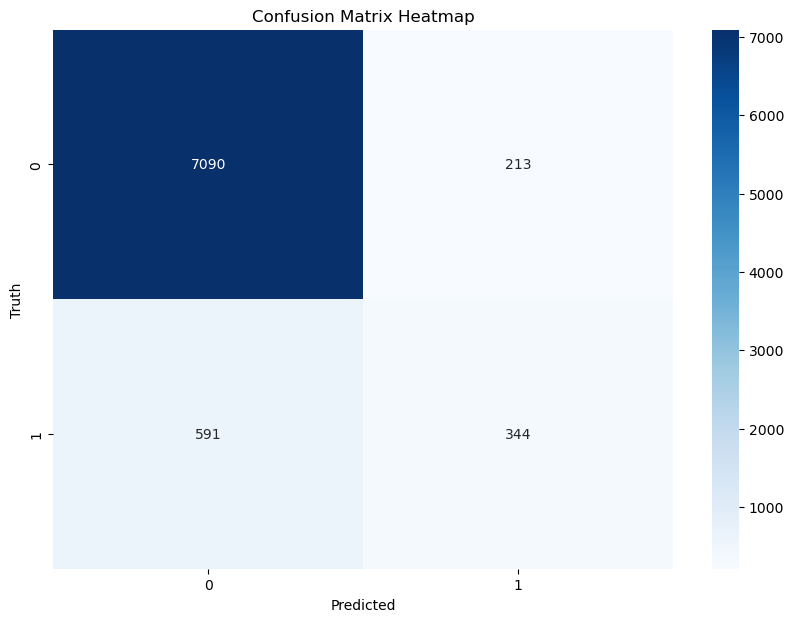

In [112]:
import seaborn as sn
# Calculate the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 'fmt=d' to display integers
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [114]:
!pip install lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 163.8 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/275.7 kB 178.6 kB/s eta 0:00:02
     -------- ---------------------------- 61.4/275.7 kB 233.8 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/275.7 kB 473.7 kB/s eta 0:00:01
     ----------------------------- ------ 225.3/275.7 kB 687.0 kB/s eta 0:00:01
     ------------------------------------ 275.7/275.7 kB 771.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=6ea1acbfba94b9d393de50523380de8d5a560f0

In [120]:
import numpy as np

# Wrapper function for model.predict to return probabilities for both classes
def predict_proba(X):
    proba = model.predict(X)  # Get probabilities for class 1 (positive class)
    return np.hstack([1 - proba, proba])  # Return probabilities for class 0 and class 1

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=[0, 1], verbose=True, mode='classification')

# Explain one instance
i = 0  # Pick an instance
exp = explainer.explain_instance(X_test.values[i], predict_proba, num_features=10)

# Display the explanation
exp.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.019673273032052574
Prediction_local [0.38749839]
Right: 0.09916686
